<h1>Item Purchased or Not</h1>

In [4]:
import os
os.chdir("A:\Documents and Data\R\Machine Learning A-Z Template Folder\Part 3 - Classification\Section 15 - K-Nearest Neighbors (K-NN)")

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", color_codes=True)

In [10]:
%matplotlib inline

In [35]:
dataset = pd.read_csv('Social_Network_Ads.csv')
col = ['User ID']
dataset = dataset.drop(col, axis = 1)
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [36]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


<h2>Data Visualizations</h2>

<h4>Relation b/w Salary and Purchased</h4>

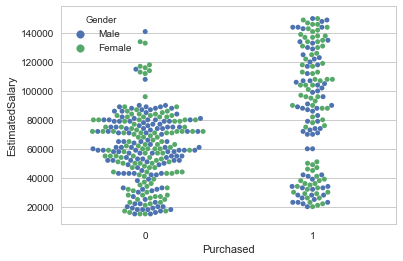

In [31]:
plot1 = sns.swarmplot(x ='Purchased', y='EstimatedSalary', hue='Gender', data = dataset)

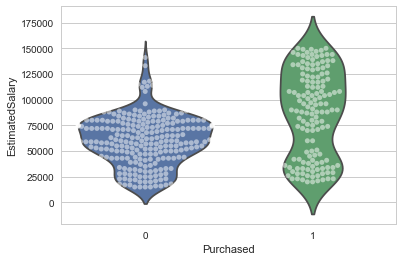

In [48]:
sns.violinplot(x="Purchased", y="EstimatedSalary", data=dataset, inner=None)
plot5 = sns.swarmplot(x="Purchased",y="EstimatedSalary", data=dataset, color="w", alpha=0.5)

<h4>Relation b/w Age and Purchased</h4>

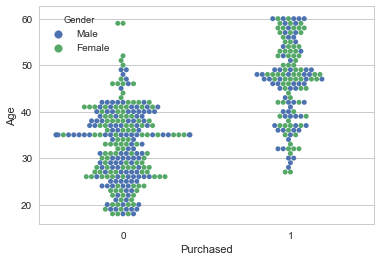

In [34]:
plot2 = sns.swarmplot(x ='Purchased', y='Age', hue='Gender', data = dataset)

<h4>Using a boxplot</h4>

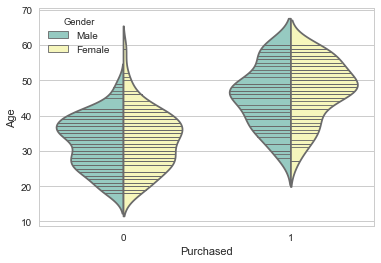

In [43]:
plot4 = sns.violinplot(x="Purchased", y="Age", hue="Gender", data = dataset, split = True, inner = "stick", palette="Set3")

<h2>Data Preprocessing</h2>

<h4>Splitting the dataset</h4>

In [54]:
x = dataset.iloc[:, [1,2]].values
y = dataset.iloc[:,3].values

In [58]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

<h4>Feature Scaling</h4>

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\Users\Nuages\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<h2>Fitting K-NN to the Training Set</h2>

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

<h4>Predicting test set results</h4>

In [66]:
y_pred = classifier.predict(X_test)

<h4>Confusion Matrix to check number of correct/incorrect predictions</h4>

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

<h2>Visualizing Results</h2>

<h4>Visualizing Training Set Results</h4>

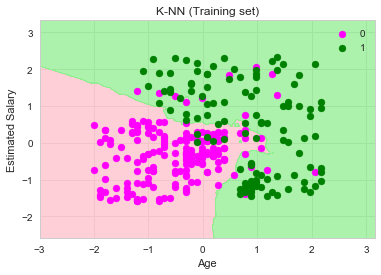

In [76]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


<h4>Visualizing Test Set Results</h4>

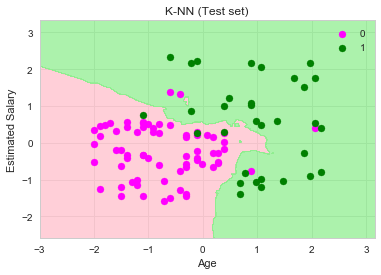

In [85]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<h3>That's it!</h3>